# Theoretical Concepts and Linear Regression

---
## **Part 1: Theoretical Concepts**
---
1. Define the following terms in the context of statistical learning:
- **Training error**: It is the error the model makes on the trainning dataset. It measures how well a model performs on the training dataset
- **Test error**: it evaluates the model's performance on unseen data. A low testing error indicates good generalization, while a high testing error may suggest overfitting or underfitting
- **Bias-cariance trade-off**: describes the trade-off between a model's ability to fit the training data well (low bias) and its ability to generalize to unseen data (low variance)
- **Overfitting**: When a model learns the training data too well, including the noise, and performs poorly on unseen data
- **Model complexity**: how well a model can fit the training data and potentially generalize to new, unseen data

2.  Explain the difference between parametric and nonparametric models in statistical learning. Provide an example of each type of model. 

| Parametric Models | Nonparametric Models |
|:-----------|:------------|
| fixed structure | Flexible |
| Few parameters | Data-driven, Parameters grow with data |
| simpler and computationally efficient | more computationally demanding and prone to overfitting with small datasets |
| Linear regression | k-Nearest Neighbors |
| Suppose we model house price based on square footage. A parametric model (linear regression) assumes a straight-line relationship: as square footage increases, price increases at a fixed rate. It simplifies reality into slope + intercept. | Instead of assuming a straight line, k-NN looks at prices of the most similar houses (neighbors in size, location, number of rooms, etc.) and predicts based on those. This adapts to neighborhoods where price jumps aren’t linear (e.g., houses near a beach are disproportionately expensive). |




3.    Discuss the bias-variance trade-off in relation to model performance. Provide an example of how a highly complex model could lead to overfitting and how a simple model might underfit the data. 
- The bias-variance trade-off explains how model complexity affects prediction:
    - **Simple models** have high bias (too rigid), which can cause *underfitting*-they miss important patterns
    - **Complex models** have high variance (too sensitive to data), which can cause *overfitting*-they memorize noise instead of generalizing
- Example:
    - A simple linear model predicting house prices from size alone may underfit
    - A deep neural network with many layers may overfit by memorizing training data
- The goal is to balance bias and variance for the best performance.

---
## **Part 2: Linear Regression** 

----
### **Fit a simple linear regression model using Size to predict Price.**

In [10]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
file_path = "dataset/USA_housing.csv"
data = pd.read_csv(file_path)

# Select independent variable (sqft_living) and dependent variable (price)
X = data[["sqft_living"]]
X = sm.add_constant(X)  # Add intercept term
y = data["price"]

# Fit simple linear regression model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

# Extract coefficients
intercept, slope = model.params
print(f"Regression Equation: Price = {intercept:.2f} + {slope:.2f} * Sqft Living")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 18 Sep 2025   Prob (F-statistic):          2.72e-175
Time:                        14:04:23   Log-Likelihood:                -60443.
No. Observations:                4140   AIC:                         1.209e+05
Df Residuals:                    4138   BIC:                         1.209e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6140.9262   2.02e+04      0.304      

#### Regression Equation
We fit a simple linear regression model with **Price** as the dependent variable and **Sqft Living** as the independent variable.

**Equation:**

$$
\text{Price} = 6140.93 + 255.14 \times \text{Sqft Living}
$$

#### Interpretation of Coefficients
- **Intercept (6140.93):**
  When the size of the house is 0 sqft, the predicted price is $6,140.93.  
  (This value has little practical meaning, but it is the baseline where the regression line crosses the y-axis.)

- **Slope (255.14):**
  For every additional 1 square foot of living space, the house price increases by $255.14, on average.  
  This shows a strong positive relationship between house size and price.

#### Regression Results
- **R-squared:** 0.175  
  This means that about 17.5% of the variation in house prices is explained by house size alone.  
  While size is important, other factors (location, age, condition, etc.) also play a large role.

- **p-value for slope (<0.001):**  
  The effect of house size on price is highly statistically significant.

#### Strongest Impact
- In this simple regression, the only predictor is Sqft Living.  
- It has a positive and significant effect on price, meaning larger homes tend to sell for more money.  
However, since R² is relatively low, other features should be included in a multiple regression model for better prediction.

----
### **Fit a multiple linear regression model using Sqft Living, Bedrooms, Age, and Waterfront  property or not, to predict Price.**

In [1]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
data = pd.read_csv("dataset/USA_housing.csv")

# Create 'age' variable
data['date'] = pd.to_datetime(data['date'])
data['year_sold'] = data['date'].dt.year
data['age'] = data['year_sold'] - data['yr_built']

# Select predictors
X = data[['sqft_living', 'bedrooms', 'age', 'waterfront']]
y = data['price']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Extract coefficients
print("\nRegression Equation:")
print(f"Price = {model.params['const']:.2f}"
      f" + {model.params['sqft_living']:.2f}*Sqft Living"
      f" + {model.params['bedrooms']:.2f}*Bedrooms"
      f" + {model.params['age']:.2f}*Age"
      f" + {model.params['waterfront']:.2f}*Waterfront")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     251.0
Date:                Fri, 19 Sep 2025   Prob (F-statistic):          2.88e-193
Time:                        09:14:53   Log-Likelihood:                -60391.
No. Observations:                4140   AIC:                         1.208e+05
Df Residuals:                    4135   BIC:                         1.208e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7346.0622   3.61e+04      0.203      

#### Regression Equation

$$
\text{Price} = 7346.06 
+ 299.34 \times \text{Sqft Living} 
- 54916.26 \times \text{Bedrooms} 
+ 2024.48 \times \text{Age} 
+ 447121.88 \times \text{Waterfront}
$$


##### Interpretation:
- **Intercept (7346.06):** Baseline price when all predictors are zero (not very meaningful in practice).

- **Sqft Living (299.34)**: Each additional square foot increases house price by $299.34, holding other variables constant.

----
### **Evaluate the models:**

#### R-squared Values:
- Simple Linear Regression (Sqft Living only): 
$$
\text{R}^2 = 0.175
$$
- Multiple Linear Regression (Sqft Living, Bedrooms, Age, Waterfont):
$$
\text{R}^2 = 0.195
$$

#### Interpretation:
- R-squared represents the proportion of variance in house prices that is explained by the model’s predictors.
- An R² of 0.175 means that about 17.5% of the variation in price is explained by house size alone.  
- An R² of 0.195 means that about 19.5% of the variation in price is explained when including all four predictors.  

#### Model Comparison:
- The multiple regression model fits slightly better because it explains more of the variability in prices (19.5% vs. 17.5%).
- However, the improvement is small (only ~2% gain). This suggests that Sqft Living is the dominant predictor, and adding Bedrooms, Age, and Waterfront improves the model only marginally in terms of overall fit.
- Still, some predictors (like Waterfront) have very strong individual effects, even if they don’t drastically increase R-squared.


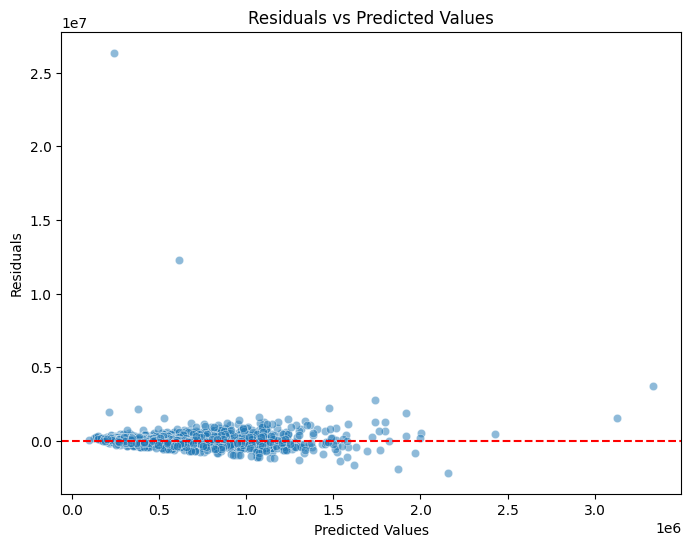

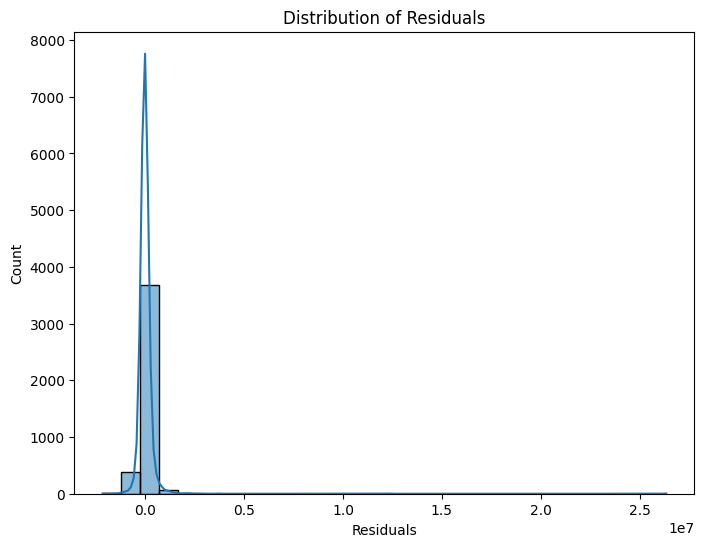

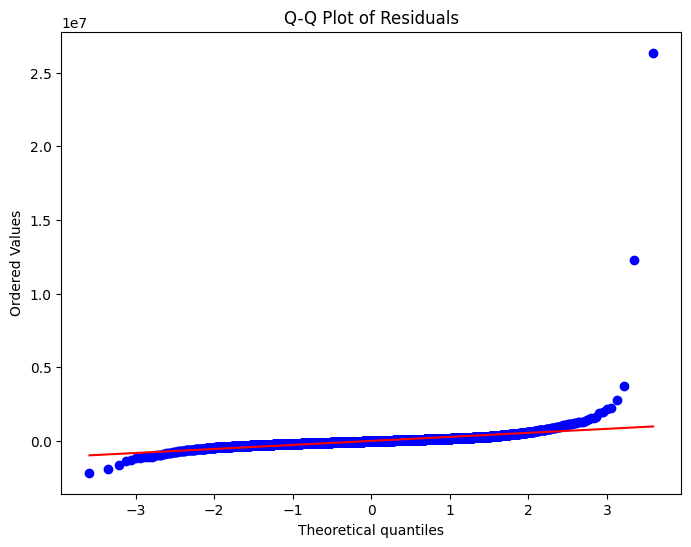

In [3]:

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Predictions and residuals
data['predicted'] = model.predict(X)
data['residuals'] = y - data['predicted']

# Residual plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['predicted'], y=data['residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8,6))
sns.histplot(data['residuals'], kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

# Q-Q plot
plt.figure(figsize=(8,6))
stats.probplot(data['residuals'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


----
### **Check the assumption of linear regression:**


#### 1. Linearity & Homoscedastcity
- Residuals vs Predicted Plot:
    - The residuals should be randomly scattered around zero without clear patterns
    - In this case, residuals show heteroscedasticity (cariance increases for higher predicted prices)
    - This violates the assumption of constant variance (homoscedasticity)
- Potential remedies:
    - Apply a log-transformamtion to the dependent variable (log(price) instead of price)
    - Consider adding interaction terms or polynomial terms to better capture no-linear effects

#### 2. Normality of Residuals
- Histogram: The residual distribution is skewed, not perfectly bell-shaped
- Q-Q Plot: Deviations from the straight diagonal line, especially in the tails, suggest no-normal residuals
- Potential remedies:
    - Log-transform the dependent variable (price)
    - Use robust regression methods that are less sensitive to non-normal residuals

#### 3. Summary of Assumptions
- Linearity: Approximate but with some non-linearity at higher prices
- Homoscedasticity: Violated (variance grows with price)
- Normality: Violated (skewed residuals).

----
## **PART 3: Model Selection and Performance**
----

### 1. Cross-Validation Results
- Training MSE: ≈ 3.25 × 10¹¹

- Testing MSE: ≈ 6.98 × 10¹⁰

The testing error is much lower than the training error, which is unusual. This can happen if the training set contains more variation (extreme values or outliers) compared to the test set.

### 2. Interpretation: Overfitting vs. Underfitting
- Normally, overfitting occurs when training error is very low, but testing error is much higher.
- The opposite is observed: the model seems to fit the test data better than the training data. This suggests that the model may be underfitting the training data, possibly due to outliers or insufficient features capturing the complexity of house prices.

**Implications:**
- The model is relatively simple, so it doesn’t overfit.
- However, it may not be capturing all important factors affecting housing prices, leading to weaker performance on the more diverse training set.

### 3. Feature Engineering Suggestion
One valuable feature to improve prediction accuracy could be:
- Location (e.g., neighborhood or city)
Housing prices are strongly influenced by geographic location. Two houses with the same size, age, and number of bedrooms can have vastly different prices if one is in downtown Seattle versus a rural suburb.

**Justification**:
- Real estate value is highly location-dependent
- Adding categorical variables such as zipcode or city would allow the model to account for neighborhood effects, capturing a large source of variability currently missing.

----
## References:
- Lecture note: https://colab.research.google.com/drive/15Lq4kiSe4JkdOJifvjS4Ac2_jMODrdoI#scrollTo=pBHLavikDQUC
- Model Complexity: https://ishanjainoffical.medium.com/model-complexity-explained-intuitively-e179e38866b6